In [ ]:
#######################
# preprocessing data #  row90
#####################

In [1]:
cd C:/Users/peng1/OneDrive/Desktop/cs273A

C:\Users\peng1\OneDrive\Desktop\cs273A


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy import stats
import statsmodels.formula.api as smf

In [59]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('diabetic_data.csv', index_col=0, parse_dates=True)
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [60]:
missing_values = ["n/a", "na", "--","?"]
df1= pd.read_csv("diabetic_data.csv",index_col=0, parse_dates=True,na_values = missing_values)
df1["readmitted"].replace({">30": "NO"}, inplace=True)
print(df1)
#df1["diag_1"]=df1["diag_1"].str.replace("250","YES")


              patient_nbr             race  gender      age weight  \
encounter_id                                                         
2278392           8222157        Caucasian  Female   [0-10)    NaN   
149190           55629189        Caucasian  Female  [10-20)    NaN   
64410            86047875  AfricanAmerican  Female  [20-30)    NaN   
500364           82442376        Caucasian    Male  [30-40)    NaN   
16680            42519267        Caucasian    Male  [40-50)    NaN   
...                   ...              ...     ...      ...    ...   
443847548       100162476  AfricanAmerican    Male  [70-80)    NaN   
443847782        74694222  AfricanAmerican  Female  [80-90)    NaN   
443854148        41088789        Caucasian    Male  [70-80)    NaN   
443857166        31693671        Caucasian  Female  [80-90)    NaN   
443867222       175429310        Caucasian    Male  [70-80)    NaN   

              admission_type_id  discharge_disposition_id  \
encounter_id                

D:\anacod\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
df1 = df1[((df1.discharge_disposition_id != 11) & 
                                          (df1.discharge_disposition_id != 13) &
                                          (df1.discharge_disposition_id != 14) & 
                                          (df1.discharge_disposition_id != 19) & 
                                          (df1.discharge_disposition_id != 20) & 
                                          (df1.discharge_disposition_id != 21))] 

In [62]:
icd9code = [(1, 139),
            (140, 239),
            (240, 279),
            (280, 289),
            (290, 319),
            (320, 389),
            (390, 459),
            (460, 519),
            (520, 579),
            (580, 629),
            (630, 679),
            (680, 709),
            (710, 739),
            (740, 759),
            (760, 779),
            (780, 799),
            (800, 999)]
icd9codelist = ['Infectious And Parasitic Diseases',
                'Neoplasms',
                'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
                'Diseases Of The Blood And Blood-Forming Organs',
                'Mental Disorders',
                'Diseases Of The Nervous System And Sense Organs',
                'Diseases Of The Circulatory System',
                'Diseases Of The Respiratory System',
                'Diseases Of The Digestive System',
                'Diseases Of The Genitourinary System',
                'Complications Of Pregnancy, Childbirth, And The Puerperium',
                'Diseases Of The Skin And Subcutaneous Tissue',
                'Diseases Of The Musculoskeletal System And Connective Tissue',
                'Congential Anomalies',
                'Certain Conditions Originating In The Perinatal Period',
                'Symptoms, Signs, And Ill-Defined Conditions',
                'Injury And Poisoning']

In [63]:
codes = zip(icd9code, icd9codelist)
codelist = set(codes)
codelist

{((1, 139), 'Infectious And Parasitic Diseases'),
 ((140, 239), 'Neoplasms'),
 ((240, 279),
  'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'),
 ((280, 289), 'Diseases Of The Blood And Blood-Forming Organs'),
 ((290, 319), 'Mental Disorders'),
 ((320, 389), 'Diseases Of The Nervous System And Sense Organs'),
 ((390, 459), 'Diseases Of The Circulatory System'),
 ((460, 519), 'Diseases Of The Respiratory System'),
 ((520, 579), 'Diseases Of The Digestive System'),
 ((580, 629), 'Diseases Of The Genitourinary System'),
 ((630, 679), 'Complications Of Pregnancy, Childbirth, And The Puerperium'),
 ((680, 709), 'Diseases Of The Skin And Subcutaneous Tissue'),
 ((710, 739), 'Diseases Of The Musculoskeletal System And Connective Tissue'),
 ((740, 759), 'Congential Anomalies'),
 ((760, 779), 'Certain Conditions Originating In The Perinatal Period'),
 ((780, 799), 'Symptoms, Signs, And Ill-Defined Conditions'),
 ((800, 999), 'Injury And Poisoning')}

In [64]:
for num_range, diagnosis in codelist:
    oldlist = range(num_range[0], num_range[1]+1)
    oldlist = [str(x) for x in oldlist]
    newlist = [diagnosis] * len(oldlist)
    for col in ['diag_1', 'diag_2', 'diag_3']:
        df1[col].replace(oldlist, newlist, inplace=True)
df1

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,"Endocrine, Nutritional And Metabolic Diseases,...",250.01,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,Infectious And Parasitic Diseases,250.43,Diseases Of The Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,Mental Disorders,Diseases Of The Circulatory System,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,Diseases Of The Digestive System,"Endocrine, Nutritional And Metabolic Diseases,...","Symptoms, Signs, And Ill-Defined Conditions",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,Infectious And Parasitic Diseases,Diseases Of The Genitourinary System,Mental Disorders,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


In [65]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df1[col].replace(oldlist, newlist, inplace=True)
    df1.loc[df1[col].str.contains('V', na=False), col] = 'Supplementary Classification of Factors Influencing Health Status and Contact with Health Services'

In [66]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df1[col].replace(oldlist, newlist, inplace=True)
    df1.loc[df1[col].str.contains('250', na=False), col] = 'Diabetes'

In [67]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df1[col].replace(oldlist, newlist, inplace=True)
    df1.loc[df1[col].str.contains('E', na=False), col] = 'External Causes of Injuries and Poisonings'

In [68]:
df1

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,Diabetes,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,External Causes of Injuries and Poisonings,Diabetes,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,"Complications Of Pregnancy, Childbirth, And Th...",External Causes of Injuries and Poisonings,Supplementary Classification of Factors Influe...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,Infectious And Parasitic Diseases,Diabetes,Diseases Of The Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,Neoplasms,Neoplasms,External Causes of Injuries and Poisonings,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,Diabetes,Mental Disorders,Diseases Of The Circulatory System,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,Diseases Of The Digestive System,External Causes of Injuries and Poisonings,"Symptoms, Signs, And Ill-Defined Conditions",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,Infectious And Parasitic Diseases,Diseases Of The Genitourinary System,Mental Disorders,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


In [69]:
df2=df1.drop(columns=['weight', 'payer_code',"medical_specialty"])

In [70]:
df2=df2.dropna()
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,External Causes of Injuries and Poisonings,Diabetes,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,"Complications Of Pregnancy, Childbirth, And Th...",External Causes of Injuries and Poisonings,Supplementary Classification of Factors Influe...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Infectious And Parasitic Diseases,Diabetes,Diseases Of The Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,External Causes of Injuries and Poisonings,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,Diseases Of The Circulatory System,Diseases Of The Circulatory System,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,Diabetes,Mental Disorders,Diseases Of The Circulatory System,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,Diseases Of The Digestive System,External Causes of Injuries and Poisonings,"Symptoms, Signs, And Ill-Defined Conditions",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,Infectious And Parasitic Diseases,Diseases Of The Genitourinary System,Mental Disorders,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


In [71]:
print(df2['diag_1'].unique())

['External Causes of Injuries and Poisonings'
 'Complications Of Pregnancy, Childbirth, And The Puerperium'
 'Infectious And Parasitic Diseases' 'Neoplasms'
 'Diseases Of The Circulatory System' 'Diabetes'
 'Diseases Of The Respiratory System' 'Injury And Poisoning'
 'Diseases Of The Skin And Subcutaneous Tissue'
 'Supplementary Classification of Factors Influencing Health Status and Contact with Health Services'
 'Symptoms, Signs, And Ill-Defined Conditions'
 'Diseases Of The Genitourinary System' 'Mental Disorders'
 'Diseases Of The Musculoskeletal System And Connective Tissue'
 'Diseases Of The Digestive System'
 'Diseases Of The Nervous System And Sense Organs'
 'Diseases Of The Blood And Blood-Forming Organs' 'Congential Anomalies']


In [72]:

#df2["age"],_=pd.factorize(df2['age'], sort=True), 0:(0-10),1:(10-20),2:(20-30),3:(30-40),4:(40-50),5:(50-60),6:(60-70),
#                                                   7:(70-80),8:(80-90)

###0:<30    1:>30   2:No
#df2["readmitted"],_=pd.factorize(df2['readmitted'],sort=True)
df2[["race","gender","age","admission_type_id","discharge_disposition_id","admission_source_id",
    "max_glu_serum","A1Cresult","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide",
     "glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","tolazamide",
     "examide","citoglipton","insulin","glyburide","metformin","glipizide","metformin","glimepiride","pioglitazone","metformin",
     "rosiglitazone","metformin","pioglitazone","change","diabetesMed","readmitted"
    ]].apply(lambda x: x.astype('category'))
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,External Causes of Injuries and Poisonings,Diabetes,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,"Complications Of Pregnancy, Childbirth, And Th...",External Causes of Injuries and Poisonings,Supplementary Classification of Factors Influe...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Infectious And Parasitic Diseases,Diabetes,Diseases Of The Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,External Causes of Injuries and Poisonings,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,Diseases Of The Circulatory System,Diseases Of The Circulatory System,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,Diabetes,Mental Disorders,Diseases Of The Circulatory System,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,Diseases Of The Digestive System,External Causes of Injuries and Poisonings,"Symptoms, Signs, And Ill-Defined Conditions",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,Infectious And Parasitic Diseases,Diseases Of The Genitourinary System,Mental Disorders,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


In [74]:
df2['admission_type_id'] = df2.admission_type_id.astype('object')
df2['discharge_disposition_id'] = df2.discharge_disposition_id.astype('object')
df2['admission_source_id'] = df2.admission_source_id.astype('object')
df2.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [20]:
import seaborn as sns
corr = df2.corr(method="pearson")
print(corr)
sns.heatmap(corr)

                    patient_nbr  time_in_hospital  num_lab_procedures  \
patient_nbr            1.000000         -0.030924            0.009300   
time_in_hospital      -0.030924          1.000000            0.320161   
num_lab_procedures     0.009300          0.320161            1.000000   
num_procedures        -0.023585          0.189407            0.052338   
num_medications        0.011261          0.461774            0.264941   
number_outpatient      0.102240         -0.011209           -0.008587   
number_emergency       0.061510         -0.010384           -0.000776   
number_inpatient       0.010778          0.072973            0.039914   
number_diagnoses       0.215057          0.211514            0.147362   

                    num_procedures  num_medications  number_outpatient  \
patient_nbr              -0.023585         0.011261           0.102240   
time_in_hospital          0.189407         0.461774          -0.011209   
num_lab_procedures        0.052338         0.26

In [21]:
df2["readmitted"]

encounter_id
149190       NO
64410        NO
500364       NO
16680        NO
35754        NO
             ..
443847548    NO
443847782    NO
443854148    NO
443857166    NO
443867222    NO
Name: readmitted, Length: 95673, dtype: object

In [94]:
df2.iloc[12]

patient_nbr                                           77586282
race                                                 Caucasian
gender                                                    Male
age                                                    [80-90)
admission_type_id                                            1
discharge_disposition_id                                     6
admission_source_id                                          7
time_in_hospital                                            10
num_lab_procedures                                          55
num_procedures                                               1
num_medications                                             31
number_outpatient                                            0
number_emergency                                             0
number_inpatient                                             0
diag_1                      Diseases Of The Circulatory System
diag_2                      Diseases Of The Circulatory

In [76]:
cat_columns = df2.select_dtypes(['object']).columns
df2[cat_columns] = df2[cat_columns].astype('category')
df2[cat_columns] = df2[cat_columns].apply(lambda x : x.cat.codes)


ValueError: No objects to concatenate

In [78]:
df2 = df2.drop(columns=['patient_nbr'])
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
149190,2,0,1,0,0,6,3,59,0,18,0,0,0,11,2,12,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
64410,0,0,2,0,0,6,2,11,5,13,2,0,1,0,11,17,6,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1
500364,2,1,3,0,0,6,2,44,1,16,0,0,0,12,2,5,7,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
16680,2,1,4,0,0,6,1,51,0,8,0,0,0,15,15,12,5,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,1
35754,2,1,5,1,0,1,3,31,6,16,0,0,0,4,4,12,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,1


In [79]:
#############################random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
dataset = df2.to_numpy().astype(float)
x = dataset[:,0:-1]
y = dataset[:,-1]
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=24)


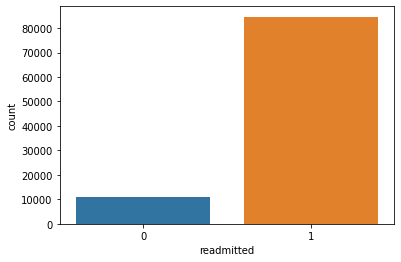

In [109]:
from sklearn.preprocessing import StandardScaler

readmitted=df2.readmitted
readmitted
x1 = pd.get_dummies(df2.drop(columns=['readmitted']))
x1
sns.countplot(readmitted)


In [87]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_scaled = x.copy()
x_scaled = scaler.fit_transform(x_scaled)
print(x_scaled)


[[ 3.95937539e-01 -9.24248730e-01 -3.27362306e+00 ... -3.23301391e-03
  -1.07445690e+00  5.45458450e-01]
 [-1.92538686e+00 -9.24248730e-01 -2.63223399e+00 ... -3.23301391e-03
   9.30702758e-01  5.45458450e-01]
 [ 3.95937539e-01  1.08186881e+00 -1.99084491e+00 ... -3.23301391e-03
  -1.07445690e+00  5.45458450e-01]
 ...
 [ 3.95937539e-01  1.08186881e+00  5.74711370e-01 ... -3.23301391e-03
  -1.07445690e+00  5.45458450e-01]
 [ 3.95937539e-01 -9.24248730e-01  1.21610044e+00 ... -3.23301391e-03
  -1.07445690e+00  5.45458450e-01]
 [ 3.95937539e-01  1.08186881e+00  5.74711370e-01 ... -3.23301391e-03
   9.30702758e-01 -1.83332021e+00]]


In [88]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [90]:
#######################
# preprocessing data #
#####################
np.savetxt("x_train.csv",x_train_scaled,delimiter=",")

In [119]:
from sklearn import metrics
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

D:\anacod\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.25      0.03      0.05      2740
         1.0       0.89      0.99      0.94     21179

    accuracy                           0.88     23919
   macro avg       0.57      0.51      0.49     23919
weighted avg       0.81      0.88      0.83     23919



In [92]:
from sklearn import metrics
randomforest = RandomForestClassifier(random_state=42,n_estimators=500)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.01      0.01      2740
         1.0       0.89      1.00      0.94     21179

    accuracy                           0.89     23919
   macro avg       0.69      0.50      0.48     23919
weighted avg       0.84      0.89      0.83     23919



In [104]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=20)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         <30       0.25      0.00      0.00      2767
          NO       0.89      1.00      0.94     21747

    accuracy                           0.89     24514
   macro avg       0.57      0.50      0.47     24514
weighted avg       0.82      0.89      0.83     24514



In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[   16  2724]
 [   17 21162]]


Text(0.5, 1.0, 'Accuracy Score: 0.8854049082319495')

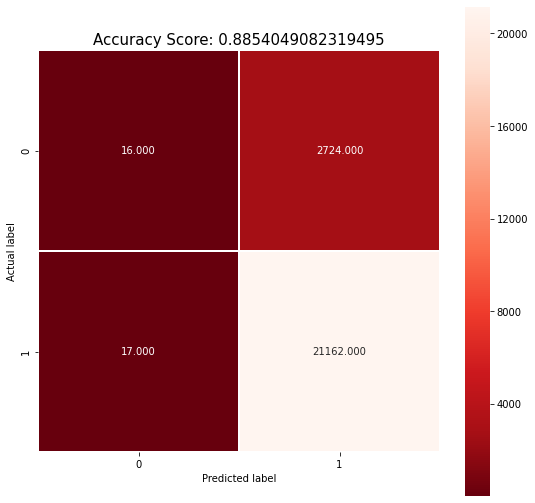

In [112]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

D:\anacod\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate')

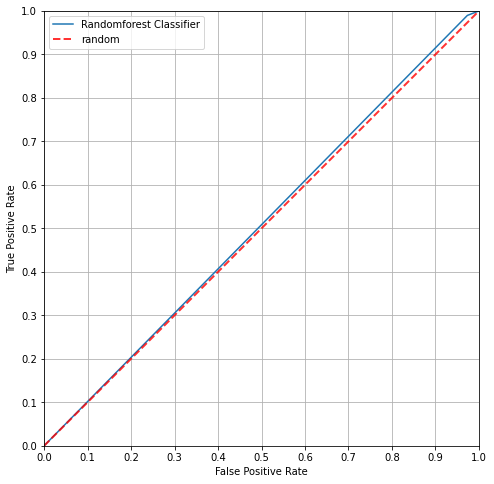

In [122]:
##############
# ROC Curve #
#############
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

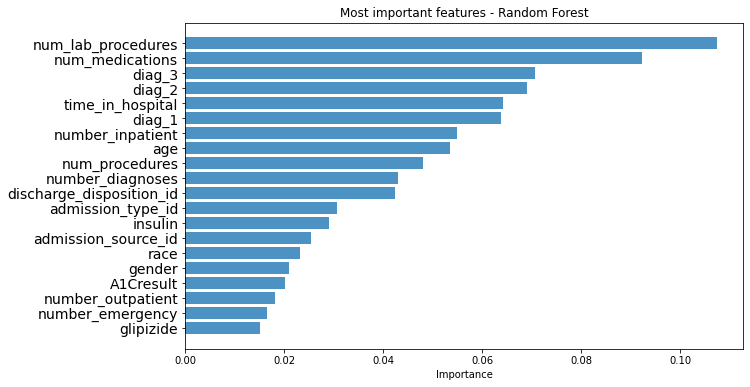

In [123]:
feature_names = df2.columns
feature_imports = randomforest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()